In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
agente1 = pd.read_csv('../results/10x10/exp_agent1.txt', sep = ";")
agente2_1 = pd.read_csv('../results/10x10/exp_agent2-1.txt', sep = ";")
agente2_2 = pd.read_csv('../results/10x10/exp_agent2-2.txt', sep = ";")
agente3_1 = pd.read_csv('../results/10x10/exp_agent3-1.txt', sep = ";")
agente3_2 = pd.read_csv('../results/10x10/exp_agent3-2.txt', sep = ";")
agente3_3 = pd.read_csv('../results/10x10/exp_agent3-3.txt', sep = ";")
agente3_4 = pd.read_csv('../results/10x10/exp_agent3-4.txt', sep = ";")
agente3_1b = pd.read_csv('../results/10x10/exp_agent3-1b.txt', sep = ";")
agente3_2b = pd.read_csv('../results/10x10/exp_agent3-2b.txt', sep = ";")
agente3_3b = pd.read_csv('../results/10x10/exp_agent3-3b.txt', sep = ";")
agente3_4b = pd.read_csv('../results/10x10/exp_agent3-4b.txt', sep = ";")

In [3]:
agente1['goal'] = np.where(agente1['next_state'] == 'i_gl', 1, 0)
agente2_1['goal'] = np.where(agente2_1['next_state'] == 'i_gl', 1, 0)
agente2_2['goal'] = np.where(agente2_2['next_state'] == 'i_gl', 1, 0)
agente3_1['goal'] = np.where(agente3_1['next_state'] == 'i_gl', 1, 0)
agente3_2['goal'] = np.where(agente3_2['next_state'] == 'i_gl', 1, 0)
agente3_3['goal'] = np.where(agente3_3['next_state'] == 'i_gl', 1, 0)
agente3_4['goal'] = np.where(agente3_4['next_state'] == 'i_gl', 1, 0)
agente3_1b['goal'] = np.where(agente3_1b['next_state'] == 'i_gl', 1, 0)
agente3_2b['goal'] = np.where(agente3_2b['next_state'] == 'i_gl', 1, 0)
agente3_3b['goal'] = np.where(agente3_3b['next_state'] == 'i_gl', 1, 0)
agente3_4b['goal'] = np.where(agente3_4b['next_state'] == 'i_gl', 1, 0)

In [4]:
agente2_1.head()

,env,config,exp,energy,current,next_state,next_move,goal
0,10x10,exp_agent2,0,100,i_ini,i_vz,1,0
0,10x10,exp_agent2,0,99,i_vz,i_ini,3,0
0,10x10,exp_agent2,0,98,i_ini,i_vz,3,0
0,10x10,exp_agent2,0,97,i_vz,i_ini,1,0
0,10x10,exp_agent2,0,96,i_ini,i_vz,2,0


In [5]:
agente3_4['next_state'].unique()

array(['i_vz', 'i_ini', 'i_s', 'i_b', 'i_bf', 'i_gl', 'i_f'], dtype=object)

In [6]:
agente = ['dummy', 'covarde-1', 'covarde-2', 'visao-1a',
          'visao-1b', 'visao-2a', 'visao-2b', 'visao-3a',
          'visao-3b', 'visao-4a', 'visao-4b']

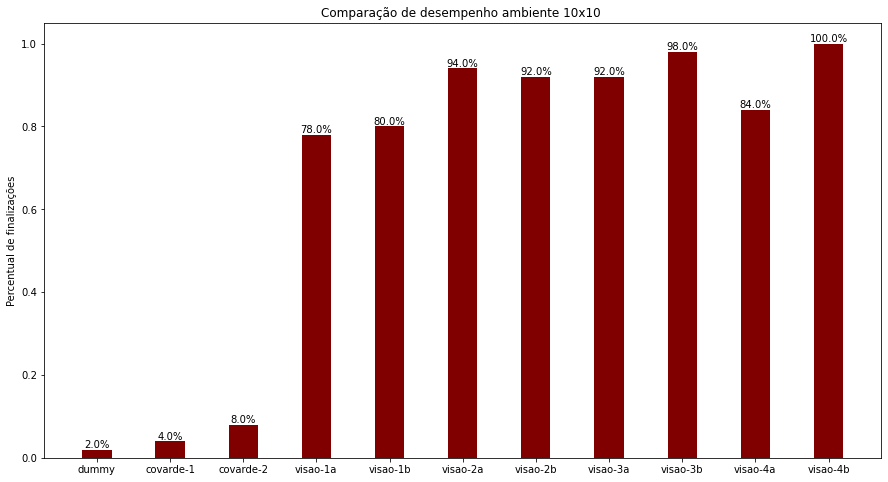

In [22]:
fig = plt.figure(figsize = (15, 8))

values = [
    round(agente1['goal'].sum()/50, 3),
    round(agente2_1['goal'].sum()/50, 3),
    round(agente2_2['goal'].sum()/50, 3),
    round(agente3_1['goal'].sum()/50, 3),
    round(agente3_1b['goal'].sum()/50, 3),
    round(agente3_2['goal'].sum()/50, 3),
    round(agente3_2b['goal'].sum()/50, 3),
    round(agente3_3['goal'].sum()/50, 3),
    round(agente3_3b['goal'].sum()/50, 3),
    round(agente3_4['goal'].sum()/50, 3),
    round(agente3_4b['goal'].sum()/50, 3)
]

# creating the bar plot
plt.bar(agente,values, color ='maroon',width = 0.4)
 
#plt.xlabel("Label agente")
plt.ylabel("Percentual de finalizações")
plt.title("Comparação de desempenho ambiente 10x10 ")

n = range(len(values))
for i in range(len(values)):
    plt.annotate(str(values[i]*100) + '%', xy=(n[i],values[i]), ha='center', va='bottom')

plt.show()

In [23]:
energy = 100
values = [
    (energy-agente1[agente1['goal']==1]['energy']),
    (energy-agente2_1[agente2_1['goal']==1]['energy']),
    (energy-agente2_2[agente2_2['goal']==1]['energy']),
    (energy-agente3_1[agente3_1['goal']==1]['energy']),
    (energy-agente3_1b[agente3_1b['goal']==1]['energy']),
    (energy-agente3_2[agente3_2['goal']==1]['energy']),
    (energy-agente3_2b[agente3_2b['goal']==1]['energy']),
    (energy-agente3_3[agente3_3['goal']==1]['energy']),
    (energy-agente3_3b[agente3_3b['goal']==1]['energy']),
    (energy-agente3_4[agente3_4['goal']==1]['energy']),
    (energy-agente3_4b[agente3_4b['goal']==1]['energy'])
]

In [24]:
df = pd.DataFrame(values[0].describe()).reset_index()\
    .rename(columns = {"energy": agente[0]})

for i in range(1,len(values)):
    tmp = pd.DataFrame(values[i].describe()).reset_index()\
    .drop("index", axis = 1)\
    .rename(columns = {"energy": agente[i]})
    
    df = pd.concat([df, tmp], axis = 1)

df

,index,dummy,covarde-1,covarde-2,visao-1a,visao-1b,visao-2a,visao-2b,visao-3a,visao-3b,visao-4a,visao-4b
0,count,1.0,2.000000,4.000000,39.000000,40.000000,47.00000,46.000000,46.000000,49.000000,42.000000,50.00000
1,mean,52.0,68.000000,54.000000,45.358974,42.850000,39.93617,46.130435,33.521739,30.061224,38.761905,29.52000
2,std,NaN,12.727922,15.705625,20.067632,23.470167,20.49327,22.645685,20.541275,18.570146,18.595580,17.74104
3,min,52.0,59.000000,41.000000,11.000000,9.000000,9.00000,9.000000,9.000000,9.000000,13.000000,9.00000
4,25%,52.0,63.500000,42.500000,29.000000,25.000000,23.00000,27.000000,18.000000,15.000000,25.000000,17.00000
5,50%,52.0,68.000000,50.000000,41.000000,38.000000,35.00000,46.000000,27.000000,27.000000,33.000000,27.00000
6,75%,52.0,72.500000,61.500000,63.000000,60.000000,59.00000,60.000000,42.500000,37.000000,50.500000,36.50000
7,max,52.0,77.000000,75.000000,91.000000,99.000000,85.00000,93.000000,93.000000,77.000000,97.000000,77.00000


In [25]:
df.to_clipboard(excel=True, decimal = ",")

In [14]:
ag = [agente3_1, agente3_1b, agente3_2, agente3_2b, agente3_3, agente3_3b, agente3_4, agente3_4b]
agente_ = ['visao-1a','visao-1b', 'visao-2a', 'visao-2b', 
           'visao-3a','visao-3b', 'visao-4a', 'visao-4b']

In [19]:
df = pd.DataFrame(columns = ['agente', '%fail', '%goal'])

for i in range(len(ag)):
    lst = list(set(ag[i]['exp'].unique()) - set(list(ag[i][ag[i]['goal']==1]['exp'])))
    fail = ag[i][(ag[i]['exp'].isin(lst)) & (ag[i]['next_state'] == 'i_vz')].groupby('exp').count()['env'].mean()
    goal = ag[i][(~ag[i]['exp'].isin(lst)) & (ag[i]['next_state'] == 'i_vz')].groupby('exp').count()['env'].mean()
    row_df = pd.DataFrame([[agente_[i], fail/energy, goal/energy]], columns = ['agente', '%fail', '%goal'])
    df = pd.concat([row_df, df], ignore_index=True)

In [20]:
df['dif'] = df['%fail'] - df['%goal']
df = df.fillna(0)
df[df['%fail'] != 0].to_clipboard(excel=True, decimal = ",")

In [21]:
df[df['%fail'] != 0]['dif'].mean()

0.4754433952053597